In [4]:
#Install required modules
!pip install 

### Importing all the requried libraries at first

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glmnet as gln

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# Exploring the data:

In [5]:
#(a)(b) Read file and produce a numerical summary of the variables in the data set.

college = pd.read_csv('College.csv')
print(college.dtypes)
college.describe()
college.set_index('Unnamed: 0', drop=True, inplace=True)
college.index.names = ['Name']

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object


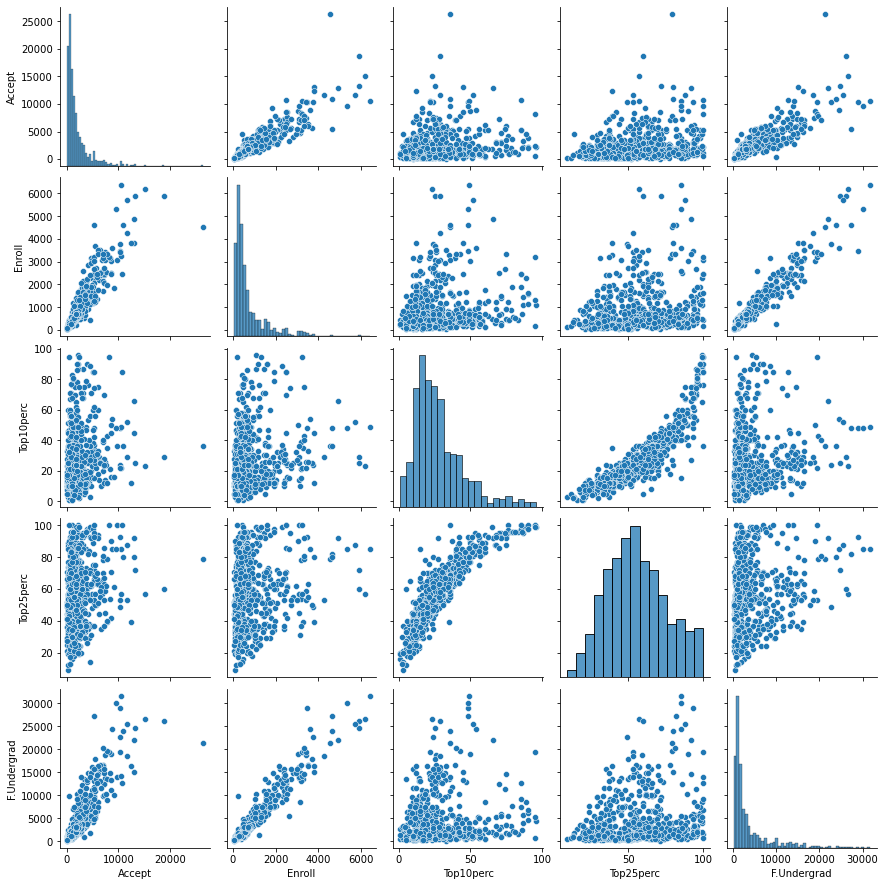

In [6]:
#(c)produce a scatterplot matrix of the first five columns or variables of the data.
import seaborn as sns
sns.pairplot(college.iloc[:,2:7]) # first 5 columns, from Apps to Top25perc

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

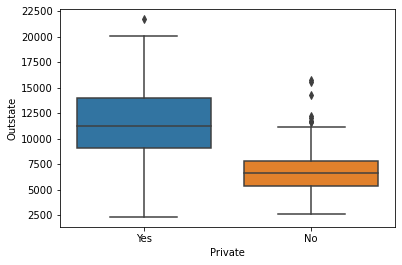

In [7]:
#(d) produce side-by-side boxplots of Outstate versus Private
sns.boxplot(x=college['Private'], y=college['Outstate'])

there are 78 elite universities.


<AxesSubplot:xlabel='Elite', ylabel='Outstate'>

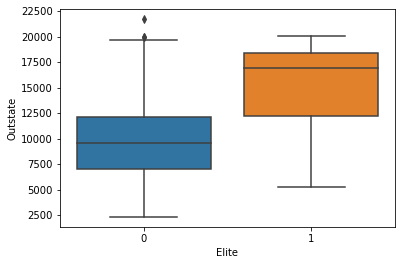

In [8]:
#(e)Create a new qualitative variable, called Elite, by binning the Top10perc variable
college['Elite'] = 0
college.loc[college['Top10perc']>50, 'Elite'] = 1
print('there are ' + str(sum(college['Elite'])) + ' elite universities.')
sns.boxplot(x=college['Elite'], y=college['Outstate'])

array([[<AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>,
        <AxesSubplot:title={'center':'Enroll'}>,
        <AxesSubplot:title={'center':'Top10perc'}>],
       [<AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>,
        <AxesSubplot:title={'center':'P.Undergrad'}>,
        <AxesSubplot:title={'center':'Outstate'}>],
       [<AxesSubplot:title={'center':'Room.Board'}>,
        <AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Personal'}>,
        <AxesSubplot:title={'center':'PhD'}>],
       [<AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>,
        <AxesSubplot:title={'center':'perc.alumni'}>,
        <AxesSubplot:title={'center':'Expend'}>],
       [<AxesSubplot:title={'center':'Grad.Rate'}>,
        <AxesSubplot:title={'center':'Elite'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

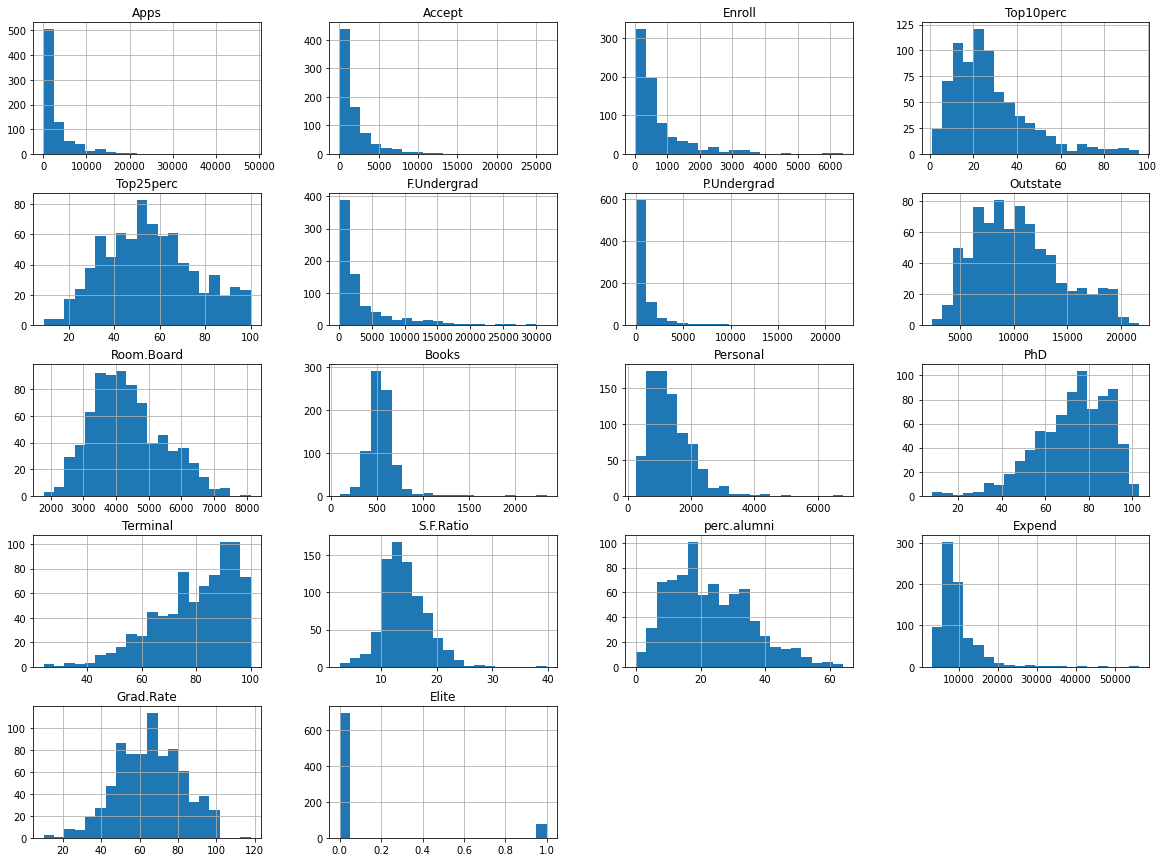

In [9]:
#(f)produce some histograms for a few of the quantitative variables
college.hist(bins=20, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>,
        <AxesSubplot:title={'center':'Enroll'}>,
        <AxesSubplot:title={'center':'Top10perc'}>],
       [<AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>,
        <AxesSubplot:title={'center':'P.Undergrad'}>,
        <AxesSubplot:title={'center':'Outstate'}>],
       [<AxesSubplot:title={'center':'Room.Board'}>,
        <AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Personal'}>,
        <AxesSubplot:title={'center':'PhD'}>],
       [<AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>,
        <AxesSubplot:title={'center':'perc.alumni'}>,
        <AxesSubplot:title={'center':'Expend'}>],
       [<AxesSubplot:title={'center':'Grad.Rate'}>,
        <AxesSubplot:title={'center':'Elite'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

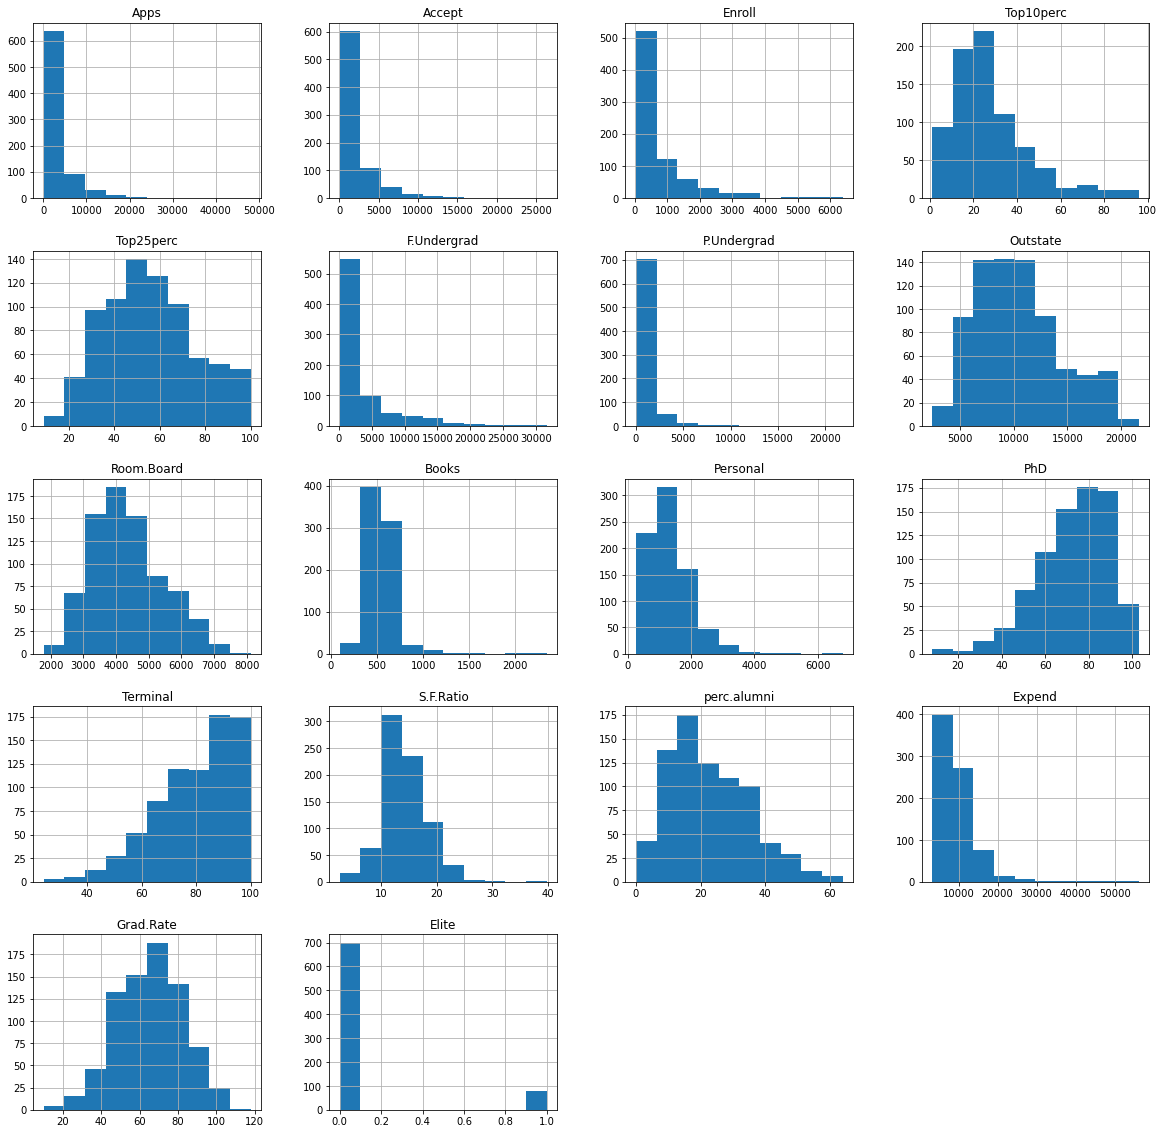

In [13]:
#(f)produce some histograms for a few of the quantitative variables
college.hist( figsize=(20,20))

#  Predict the number of applications received (variable Apps)


In [16]:
dummies = pd.get_dummies(college[['Private']], drop_first=True)
dummies.info()
print(dummies.head(20))


<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Private_Yes  777 non-null    uint8
dtypes: uint8(1)
memory usage: 26.8+ KB
                                         Private_Yes
Name                                                
Abilene Christian University                       1
Adelphi University                                 1
Adrian College                                     1
Agnes Scott College                                1
Alaska Pacific University                          1
Albertson College                                  1
Albertus Magnus College                            1
Albion College                                     1
Albright College                                   1
Alderson-Broaddus College                          1
Alfred University                                  1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X = college[['Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books',
             'Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate','Elite']]
X = pd.concat([X, dummies[['Private_Yes']]],axis=1)
print(X.head())
print(X.shape)
y = college[['Apps']]
print(y.head())


X = PolynomialFeatures(include_bias=False).fit_transform(X)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

                              Accept  Enroll  Top10perc  Top25perc  \
Name                                                                 
Abilene Christian University    1232     721         23         52   
Adelphi University              1924     512         16         29   
Adrian College                  1097     336         22         50   
Agnes Scott College              349     137         60         89   
Alaska Pacific University        146      55         16         44   

                              F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Name                                                                           
Abilene Christian University         2885          537      7440        3300   
Adelphi University                   2683         1227     12280        6450   
Adrian College                       1036           99     11250        3750   
Agnes Scott College                   510           63     12960        5450   
Alaska Pacific University    

In [18]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
 18  Eli

### Standarlize all explanatory variables


In [19]:
##
from sklearn import preprocessing
print((X_train.shape))
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
print((X_train_scaled.shape))
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

(582, 189)
(582, 189)
[-1.06539443e-16  1.96959669e-16 -1.45359097e-16  2.45698841e-16
  1.57853875e-16  3.24291949e-18  2.32727163e-16  2.98348593e-16
 -4.56679368e-16 -1.85037171e-16  3.97925297e-16 -5.02461761e-16
 -1.96482769e-17 -3.58437983e-16  2.65156358e-16 -9.91951843e-18
  5.79910308e-17  1.98008849e-16  6.72428894e-17  1.19224981e-17
  1.78217502e-16  6.86735892e-18  6.44768698e-17 -1.48792776e-17
  1.93287539e-16  1.76643732e-16  1.23230941e-16  2.34539383e-16
  3.27677938e-16  2.95248743e-16  9.04202257e-17  1.01794289e-16
  3.16303875e-16  5.38896915e-18  4.67361926e-17  4.18718134e-17
  1.33818119e-16 -2.65442498e-16  1.65126599e-16 -9.68106847e-17
 -1.17603521e-16 -2.16464876e-16  3.58628743e-17  1.63099774e-16
 -2.15558766e-16  6.29031001e-17  2.87093755e-17 -2.47034161e-17
 -9.66437697e-17 -2.27242814e-16  2.78712238e-16  9.82413845e-17
  2.95677953e-17 -1.47266697e-16  5.34127916e-17  1.04518580e-16
 -2.52470820e-16 -7.28703085e-17  1.77788292e-16 -9.53799849e-18
  1

/home/guolinux/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/guolinux/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


### Linear model using leat squares

In [20]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression(fit_intercept=True,normalize=True)
regr.fit(X_train_scaled, y_train)
print(regr.coef_)
print(regr.intercept_)
pred = regr.predict(X_test_scaled)
print(y_test.head(10))
print(pred[0:9])
mean_squared_error(y_test, pred)

[[ 5.56845974e+03 -1.01604930e+04  1.53509343e+03 -2.25920685e+03
   9.09048194e+03 -1.61327279e+03 -1.05276975e+03 -1.34335731e+03
   1.35428560e+03 -3.85631989e+02  7.35348238e+02  5.34219887e+01
  -7.59368576e+02  2.22008039e+02  3.93222199e+02  7.53116640e+02
   5.40337111e+02  1.97497301e+02  3.55062096e+03 -4.87301772e+03
  -1.99481060e+02  6.39969144e+02 -1.20500789e+03 -9.28126338e+02
  -1.91806782e+03 -6.18921535e+02  1.83716578e+02 -1.17072289e+03
   1.40327341e+02  1.86159395e+03  3.21415059e+02  1.57679568e+02
  -6.75296675e+02 -1.00251458e+03 -2.36659096e+02 -3.23146989e+01
   1.97550367e+03 -5.19687384e+02  1.56396028e+03 -8.75985165e+02
   2.03940868e+03  2.48696478e+03 -3.89442824e+03  6.62876504e+03
   2.30522317e+02  3.22458602e+03 -5.30888576e+03  2.58856383e+03
  -5.48562971e+02  2.37801913e+03  2.10938060e+03  3.33597329e+02
   7.89050025e+02 -1.23818822e+03  1.01639102e+03  1.58709704e+03
   1.69197123e+02  9.97058920e+02  6.61943721e+01  1.01735097e+03
   7.97714

2456590.7597358283

### Ridge regression model

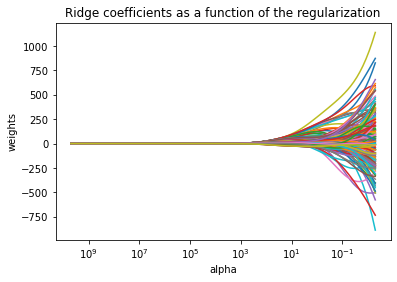

In [21]:
alphas = 10**np.linspace(10, -2, 100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a,normalize=True)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, np.array(coefs).reshape(100,189))
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');
    

The above plot shows that the Ridge coefficients get larger when we decrease alpha.

In [22]:
ridge_cv = RidgeCV(alphas = alphas, normalize= True,scoring='neg_mean_squared_error', cv = 10)
ridge_cv.fit(X_train_scaled, y_train)
ridge_cv.alpha_

0.03527401155359316

In [23]:
ridge2 = Ridge()
ridge2.set_params(alpha=ridge_cv.alpha_)
ridge2.fit(X_train_scaled, y_train)
pred = ridge2.predict(X_test_scaled)
mean_squared_error(y_test, pred)

1721720.383946119

In [30]:
ridge5 = gln.ElasticNet(alpha=0, scoring='mean_squared_error')
ridge5.fit(X_train_scaled, y_train.values.ravel())

ElasticNet(alpha=0, scoring='mean_squared_error')

In [31]:
# Lambda with best CV performance
ridge5.lambda_max_

373.97181401736964

In [32]:
# Lambda larger than lambda_max_, but with a CV score that is within 1 standard deviation away from lambda_max_ 
ridge5.lambda_best_

array([1509.73066742])

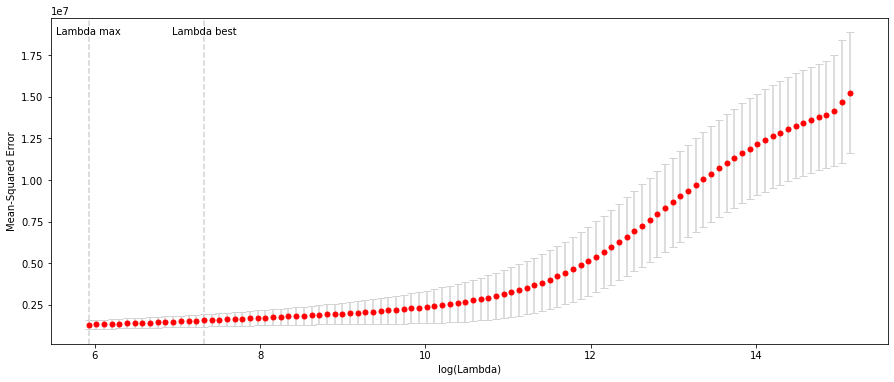

In [33]:
plt.figure(figsize=(15,6))
plt.errorbar(np.log(ridge5.lambda_path_), -ridge5.cv_mean_score_, color='r', linestyle='None', marker='o',
             markersize=5, yerr=ridge5.cv_standard_error_, ecolor='lightgrey', capsize=4)

for ref, txt in zip([ridge5.lambda_best_, ridge5.lambda_max_], ['Lambda best', 'Lambda max']):
    plt.axvline(x=np.log(ref), linestyle='dashed', color='lightgrey')
    plt.text(np.log(ref), .95*plt.gca().get_ylim()[1], txt, ha='center')

plt.xlabel('log(Lambda)')
plt.ylabel('Mean-Squared Error');

In [52]:
# MSE for lambda with best CV performance
pred = ridge5.predict(X_test_scaled, lamb=ridge5.lambda_max_)
mean_squared_error(y_test, pred)

696310.743457913

### Lasso regression model

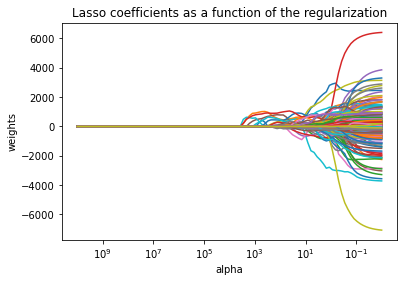

In [36]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');



In [54]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())
lassocv.alpha_

13.130867422072235

In [55]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
mean_squared_error(y_test, lasso.predict(scale(X_test)))

700517.826900681

In [56]:
lasso3 = gln.ElasticNet(alpha=1, scoring='mean_squared_error', n_splits=10)
lasso3.fit(X_train_scaled, y_train.values.ravel())

ElasticNet(n_splits=10, scoring='mean_squared_error')

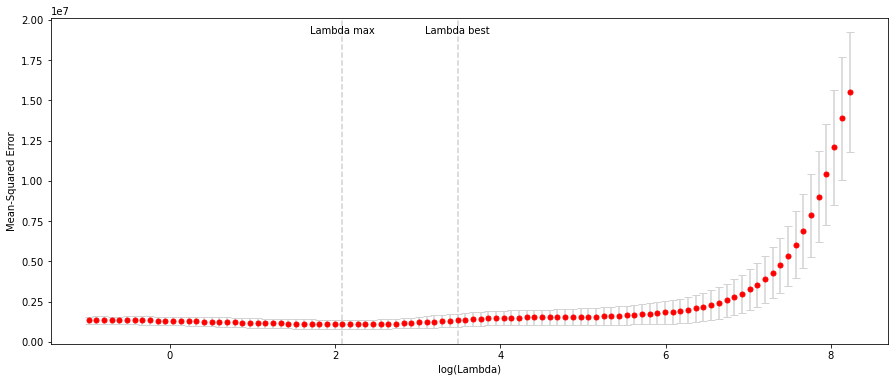

In [57]:
plt.figure(figsize=(15,6))
plt.errorbar(np.log(lasso3.lambda_path_), -lasso3.cv_mean_score_, color='r', linestyle='None', marker='o',
             markersize=5, yerr=lasso3.cv_standard_error_, ecolor='lightgrey', capsize=4)

for ref, txt in zip([lasso3.lambda_best_, lasso3.lambda_max_], ['Lambda best', 'Lambda max']):
    plt.axvline(x=np.log(ref), linestyle='dashed', color='lightgrey')
    plt.text(np.log(ref), .95*plt.gca().get_ylim()[1], txt, ha='center')

plt.xlabel('log(Lambda)')
plt.ylabel('Mean-Squared Error');

In [58]:
pred = lasso3.predict(X_test_scaled, lamb=lasso3.lambda_max_)
mean_squared_error(y_test, pred)

720158.5391518113

### Random forest model

In [59]:
forest = RandomForestRegressor(max_depth = 200)
forest.fit(X_train_scaled,y_train)
pred = forest.predict(X_test_scaled)
mean_squared_error(y_test, pred)

778448.3837153844

### Fit a elastic net model 

In [60]:
ElaTest = skl_lm.ElasticNetCV()
ElaTest.fit(X_train_scaled,y_train)
pred = ElaTest.predict(X_test_scaled)
mean_squared_error(y_test, pred)

944287.5489851236

### Comments on the final results

After trying different models to fit the dataset and predict the app per uni, we obtain varied but close results.
During the process of coding, I primairily referred the ISLR-python chapter6 notebook on the github and here I have to say thank you to the author.

As we can see above, the linear regression model got the worst performance compared with other approaches, considering it's the easiest way to do regression.
Then we come to the rest models which show similar performances after training with proper parameters.
The MSE value is close to 700000 during aforementioned prediction.
